# Expenses 2022
## A personal project to know how I spend money :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Playing around with data starts :D

In [2]:
# reading the csv file
df = pd.read_csv("C:/Users/LENOVO/Downloads/Expenses.csv")
df.columns

Index(['Expense', 'Amount', 'Category', 'Comment', 'Date', 'Mode of payment '], dtype='object')

In [3]:
# Dropping the comments column as it is not required
df.drop('Comment', axis=1, inplace=True)
df.head()

,Expense,Amount,Category,Date,Mode of payment
0,Travel,85.0,Travel,"April 1, 2022",NaN
1,Necessities,310.0,General items,"April 3, 2022",NaN
2,Haircut and Beard Trimming,220.0,Others,"April 3, 2022",NaN
3,Laundry,50.0,Clothes,"April 5, 2022",NaN
4,Lunch,100.0,Food,"April 8, 2022",NaN


In [4]:
df['Mode of payment '] = df['Mode of payment '].fillna("Cash")
df.head()

,Expense,Amount,Category,Date,Mode of payment
0,Travel,85.0,Travel,"April 1, 2022",Cash
1,Necessities,310.0,General items,"April 3, 2022",Cash
2,Haircut and Beard Trimming,220.0,Others,"April 3, 2022",Cash
3,Laundry,50.0,Clothes,"April 5, 2022",Cash
4,Lunch,100.0,Food,"April 8, 2022",Cash


In [5]:
# Now time to know different categories that I've been spending money on
categories = df['Category'].unique()
categories

array(['Travel', 'General items ', 'Others', 'Clothes', 'Food', 'Lended',
       'Sports', 'Food, Others, Travel', 'Food, General items ', 'Bills',
       'Education', nan, 'Entertainment', 'Education, General items ',
       'Bills, General items ', 'Bills, Clothes, General items ',
       'General items , Travel', 'Clothes, Lended', 'Food, Others'],
      dtype=object)

In [6]:
categories = list(categories)
for category in categories:
    if isinstance(category, str):
        if category.__contains__(','):
            categories.remove(category)
    else:
        categories.remove(category)
categories = np.array(categories)
categories

array(['Travel', 'General items ', 'Others', 'Clothes', 'Food', 'Lended',
       'Sports', 'Food, General items ', 'Bills', 'Education',
       'Entertainment', 'Bills, General items ', 'General items , Travel',
       'Food, Others'], dtype='<U22')

## Data now ready for analysis

### Mode of Payment visualisation

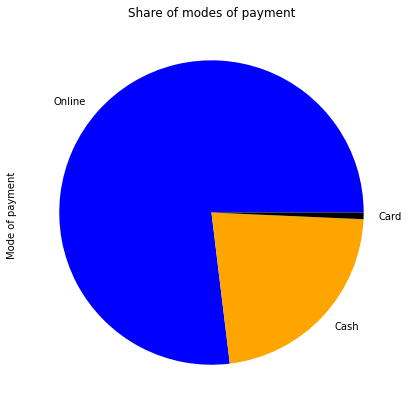

In [7]:
modes = df['Mode of payment '].value_counts()
modes.plot(kind='pie', figsize=(7, 7), colors=['blue', 'orange', 'black']);
plt.title("Share of modes of payment");

In [8]:
# Since data type of date is a string, making a new column for month
months = {'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

#creating a function to extract the month number
def getMonth(row) -> int:
    for month in months.keys():
        if row['Date'].__contains__(month):
            return months.get(month)
#creating a function to extract the day number
def getDay(row) -> int:
    day = row['Date'].split(',')
    day = day[0][-2:]
    return int(day)

#applying the above function and creating a new column
df['Month'] = df.apply(getMonth, axis=1)
df['Day'] = df.apply(getDay, axis=1)
df.drop('Date', axis=1, inplace=True)
df.head()

,Expense,Amount,Category,Mode of payment,Month,Day
0,Travel,85.0,Travel,Cash,4,1
1,Necessities,310.0,General items,Cash,4,3
2,Haircut and Beard Trimming,220.0,Others,Cash,4,3
3,Laundry,50.0,Clothes,Cash,4,5
4,Lunch,100.0,Food,Cash,4,8


In [9]:
def MonthCharts(month: int) -> None:
    '''Takes in one argument
    month (int): Enter the month number to get details about the expenditure. For example: 5 = month of May'''
    plt.figure(figsize=(10, 10))

    monthly_df = df[df["Month"]==month]

    plt.subplot(221)
    plt.title("Daywise trend of expenditure")
    grouped_df = monthly_df.groupby("Day")
    daywise_expenditure = grouped_df["Amount"].sum()
    sns.lineplot(data = daywise_expenditure, color = "black");

    plt.subplot(222)
    plt.title("Category wise share of expediture (in terms of count)")
    monthly_df['Category'].value_counts().plot(kind="pie");
    
    plt.subplot(224)
    plt.title("Category wise share of expediture (in terms of amount)")
    grouped_df = monthly_df.groupby("Category")
    categoryWise_expenditure = grouped_df["Amount"].sum()
    categoryWise_expenditure.plot(kind="pie");
    
    plt.subplot(223)
    plt.title("Modes of payment (count)")
    monthly_df["Mode of payment "].value_counts().plot(kind="bar", color="Orange");
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

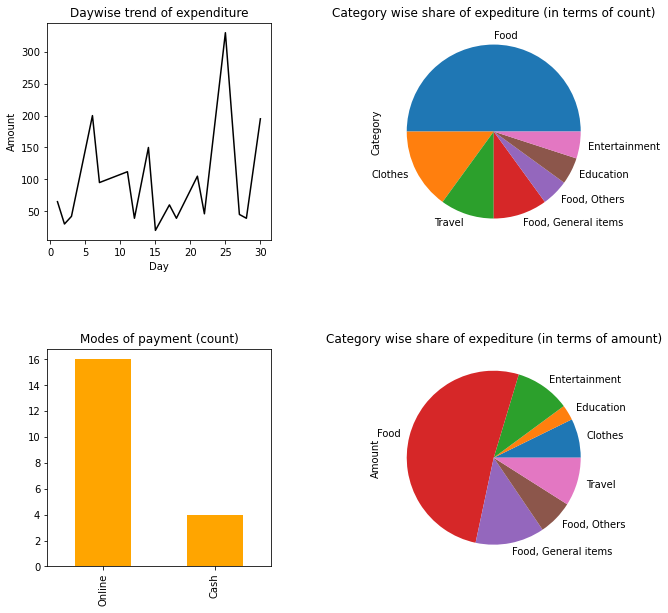

In [10]:
MonthCharts(11)